In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
training_set = pd.read_csv("data/mini_data/data/training_set/log_mini.csv")
training_set.hist_user_behavior_reason_start = training_set.hist_user_behavior_reason_start.astype('category')
training_set.hist_user_behavior_reason_end = training_set.hist_user_behavior_reason_end.astype('category')
training_set.context_type = training_set.context_type.astype('category')
training_set.date = training_set.date.apply(pd.to_datetime)


track_features = pd.read_pickle("data/pickles/track_features.pkl")

In [4]:
track_features.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [5]:
training_set.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [6]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 21 columns):
session_id                         167880 non-null object
session_position                   167880 non-null int64
session_length                     167880 non-null int64
track_id_clean                     167880 non-null object
skip_1                             167880 non-null bool
skip_2                             167880 non-null bool
skip_3                             167880 non-null bool
not_skipped                        167880 non-null bool
context_switch                     167880 non-null int64
no_pause_before_play               167880 non-null int64
short_pause_before_play            167880 non-null int64
long_pause_before_play             167880 non-null int64
hist_user_behavior_n_seekfwd       167880 non-null int64
hist_user_behavior_n_seekback      167880 non-null int64
hist_user_behavior_is_shuffle      167880 non-null bool
hour_of_day                        16

In [7]:
acoustic_vectors = (
    track_features.set_index(
        'track_id'
    )[[c for c in track_features.columns if 'acoustic_vector' in c]]
    .rename(columns={f'acoustic_vector_{n}':f'av{n}' for n in range(8)})
    .reset_index()
)
acoustic_vectors.head()

,track_id,av0,av1,av2,av3,av4,av5,av6,av7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [8]:
session_vectors = (
    training_set[['session_id','session_position','track_id_clean']]
    .merge(
        acoustic_vectors,
        how='left',
        left_on=['track_id_clean'],
        right_on=['track_id']
    ).drop(columns='track_id_clean')
)
session_vectors.head()

,session_id,session_position,track_id,av0,av1,av2,av3,av4,av5,av6,av7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,t_64f3743c-f624-46bb-a579-0f3f9a07a123,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315


In [18]:
# cumsum for av0 at row 2 should be:
-0.815775 + -0.713646

-1.5294210000000001

In [19]:
# session_vectors.set_index(['session_id','session_position','track_id'])
# session_vectors.cumsum()
session_vec_cumsum = session_vectors.drop(columns=['track_id']).groupby(['session_id']).cumsum()
session_vec_cumsum.head()

,session_position,av0,av1,av2,av3,av4,av5,av6,av7
0,1,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
1,3,-1.529421,0.750127,0.540475,-0.014194,-0.716538,0.081808,-0.718898,0.363747
2,6,-2.271962,1.125727,0.793135,-0.063201,-1.016282,0.145149,-1.205588,0.545351
3,10,-2.977077,1.443289,1.082276,-0.102122,-1.409640,0.237868,-1.570006,0.830954
4,15,-3.845567,1.774569,1.292754,-0.017381,-1.742928,0.212162,-2.080355,1.013269


In [20]:
session_vec_cumsum.shape

(167880, 9)

In [21]:
sv2 = session_vectors.copy()
for i in range(8):
    sv2[f'av{i}_pastavg'] = session_vec_cumsum[f'av{i}'] - session_vectors[f'av{i}']
    sv2[f'av{i}_pastavg'][session_vectors.session_position == 1] = np.NaN
    sv2[f'av{i}_pastavg'] /= session_vectors.session_position
    
sv2.head()

/Users/Austin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,session_id,session_position,track_id,av0,av1,av2,av3,av4,av5,av6,av7,av0_pastavg,av1_pastavg,av2_pastavg,av3_pastavg,av4_pastavg,av5_pastavg,av6_pastavg,av7_pastavg
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,-0.407887,0.193205,0.115080,0.014014,-0.166687,0.007726,-0.176795,0.102913
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,-0.509807,0.250042,0.180158,-0.004731,-0.238846,0.027269,-0.239633,0.121249
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,-0.567990,0.281432,0.198284,-0.015800,-0.254071,0.036287,-0.301397,0.136338
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,t_64f3743c-f624-46bb-a579-0f3f9a07a123,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,-0.595415,0.288658,0.216455,-0.020424,-0.281928,0.047574,-0.314001,0.166191


In [22]:
sv2.to_pickle("data/pickles/session_accoustic_vec_with_past_avg.pkl")

***

Now what if we split up the vectors by averege skipped and average not skipped past vectors

In [23]:
training_set.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [15]:
test = pd.DataFrame({
    "a":pd.Series(np.random.randint(0,2,10)),
    "b":pd.Series(np.random.randint(0,2,10))
})
test['and'] = test['a'] & test['b']
test['or'] = test['a'] | test['b']
test['xor'] = test['a'] ^ test['b']
test

,a,b,and,or,xor
0,0,0,0,0,0
1,1,1,1,1,0
2,1,0,0,1,1
3,0,1,0,1,1
4,0,1,0,1,1
5,1,0,0,1,1
6,1,1,1,1,0
7,0,0,0,0,0
8,0,0,0,0,0
9,0,0,0,0,0


In [16]:
# Using skip_2 as the ground truth
training_set['skipped'] = (training_set.skip_2 | training_set.skip_1).astype('int32')
training_set = training_set.drop(columns=['skip_1','skip_2','skip_3','not_skipped'])

In [17]:
training_set.head()

,session_id,session_position,session_length,track_id_clean,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,skipped
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0


In [18]:
acoustic_vectors.head()

,track_id,av0,av1,av2,av3,av4,av5,av6,av7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [19]:
# Merge the acoustic_vectors in with the relevant data
session_vectors = session_vectors.merge(
    training_set[['session_id','session_position','skipped']],
    how='left',
    on=['session_id','session_position']
)
session_vectors.head(15)

,session_id,session_position,track_id,av0,av1,av2,av3,av4,av5,av6,av7,skipped
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,0
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,0
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,t_64f3743c-f624-46bb-a579-0f3f9a07a123,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,0
5,0_00006f66-33e5-4de7-a324-2d18e439fc1e,6,t_c815228b-3212-4f9e-9d4f-9cb19b248184,-0.817504,0.283297,0.387589,0.279636,-0.280334,0.117993,0.106159,0.311233,0
6,0_00006f66-33e5-4de7-a324-2d18e439fc1e,7,t_e23c19f5-4c32-4557-aa44-81372c2e3705,-0.748412,0.321976,0.237488,0.003480,-0.315287,0.032431,-0.464694,0.200836,1
7,0_00006f66-33e5-4de7-a324-2d18e439fc1e,8,t_0be6eced-f56f-48bd-8086-f2e0b760fdee,-0.921928,0.359740,0.293674,0.115302,-0.274987,0.043193,-0.444351,0.211909,1
8,0_00006f66-33e5-4de7-a324-2d18e439fc1e,9,t_f3ecbd3b-9e8e-4557-b8e0-39cfcd7e65dd,-0.744412,0.308700,0.230126,0.066493,-0.242549,0.025370,-0.403210,0.159350,1
9,0_00006f66-33e5-4de7-a324-2d18e439fc1e,10,t_2af4dfa0-7df3-4b7e-b7ab-353ba48237f9,-0.647221,0.316101,0.251329,-0.041532,-0.252359,0.059971,-0.313696,0.126421,1


In [20]:
session_vectors.head()
skip_vecs = session_vectors.copy()
play_vecs = session_vectors.copy()
for i in range(8):
    skip_vecs[f'av{i}'] *= session_vectors.skipped
    play_vecs[f'av{i}'] *= (session_vectors.skipped != 1).astype('int32')

In [21]:
skip_vecs.head(10)

,session_id,session_position,track_id,av0,av1,av2,av3,av4,av5,av6,av7,skipped
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,t_64f3743c-f624-46bb-a579-0f3f9a07a123,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0
5,0_00006f66-33e5-4de7-a324-2d18e439fc1e,6,t_c815228b-3212-4f9e-9d4f-9cb19b248184,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0
6,0_00006f66-33e5-4de7-a324-2d18e439fc1e,7,t_e23c19f5-4c32-4557-aa44-81372c2e3705,-0.748412,0.321976,0.237488,0.003480,-0.315287,0.032431,-0.464694,0.200836,1
7,0_00006f66-33e5-4de7-a324-2d18e439fc1e,8,t_0be6eced-f56f-48bd-8086-f2e0b760fdee,-0.921928,0.359740,0.293674,0.115302,-0.274987,0.043193,-0.444351,0.211909,1
8,0_00006f66-33e5-4de7-a324-2d18e439fc1e,9,t_f3ecbd3b-9e8e-4557-b8e0-39cfcd7e65dd,-0.744412,0.308700,0.230126,0.066493,-0.242549,0.025370,-0.403210,0.159350,1
9,0_00006f66-33e5-4de7-a324-2d18e439fc1e,10,t_2af4dfa0-7df3-4b7e-b7ab-353ba48237f9,-0.647221,0.316101,0.251329,-0.041532,-0.252359,0.059971,-0.313696,0.126421,1


In [22]:
play_vecs.head(10)

,session_id,session_position,track_id,av0,av1,av2,av3,av4,av5,av6,av7,skipped
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,0
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,0
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,t_64f3743c-f624-46bb-a579-0f3f9a07a123,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,0
5,0_00006f66-33e5-4de7-a324-2d18e439fc1e,6,t_c815228b-3212-4f9e-9d4f-9cb19b248184,-0.817504,0.283297,0.387589,0.279636,-0.280334,0.117993,0.106159,0.311233,0
6,0_00006f66-33e5-4de7-a324-2d18e439fc1e,7,t_e23c19f5-4c32-4557-aa44-81372c2e3705,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,1
7,0_00006f66-33e5-4de7-a324-2d18e439fc1e,8,t_0be6eced-f56f-48bd-8086-f2e0b760fdee,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,1
8,0_00006f66-33e5-4de7-a324-2d18e439fc1e,9,t_f3ecbd3b-9e8e-4557-b8e0-39cfcd7e65dd,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,1
9,0_00006f66-33e5-4de7-a324-2d18e439fc1e,10,t_2af4dfa0-7df3-4b7e-b7ab-353ba48237f9,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,1


In [23]:
skip_cumsum = skip_vecs.drop(columns=['track_id','skipped','session_position','skipped']).groupby(['session_id']).cumsum()
play_cumsum = play_vecs.drop(columns=['track_id','skipped','session_position','skipped']).groupby(['session_id']).cumsum()
skip_cumsum.head(10)

,av0,av1,av2,av3,av4,av5,av6,av7
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,-0.748412,0.321976,0.237488,0.003480,-0.315287,0.032431,-0.464694,0.200836
7,-1.670340,0.681716,0.531162,0.118782,-0.590274,0.075624,-0.909046,0.412745
8,-2.414752,0.990416,0.761287,0.185275,-0.832823,0.100994,-1.312256,0.572094
9,-3.061974,1.306517,1.012616,0.143743,-1.085182,0.160965,-1.625952,0.698516


In [24]:
for c in skip_cumsum.columns:
    # Average the columns
    skip_cumsum[c] = (skip_cumsum[c] - (skip_vecs[c] * session_vectors.skipped)) / skip_vecs.session_position
    play_cumsum[c] = (play_cumsum[c] - (skip_vecs[c] * (session_vectors.skipped != 1).astype('int32'))) / skip_vecs.session_position
    # Clear the first rows
    skip_cumsum[c][skip_vecs.session_position == 1] = np.NaN
    play_cumsum[c][skip_vecs.session_position == 1] = np.NaN
skip_cumsum.head(30)

,av0,av1,av2,av3,av4,av5,av6,av7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,-0.093551,0.040247,0.029686,0.000435,-0.039411,0.004054,-0.058087,0.025104
8,-0.185593,0.075746,0.059018,0.013198,-0.065586,0.008403,-0.101005,0.045861
9,-0.241475,0.099042,0.076129,0.018528,-0.083282,0.010099,-0.131226,0.057209


In [25]:
skip_cumsum.columns = [f"skip_{c}" for c in skip_cumsum.columns]
play_cumsum.columns = [f"play_{c}" for c in play_cumsum.columns]
skip_cumsum.head()

,skip_av0,skip_av1,skip_av2,skip_av3,skip_av4,skip_av5,skip_av6,skip_av7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
play_cumsum.head()

,play_av0,play_av1,play_av2,play_av3,play_av4,play_av5,play_av6,play_av7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.764710,0.375064,0.270238,-0.007097,-0.358269,0.040904,-0.359449,0.181873
2,-0.757321,0.375242,0.264378,-0.021067,-0.338761,0.048383,-0.401863,0.181784
3,-0.744269,0.360822,0.270569,-0.025530,-0.352410,0.059467,-0.392501,0.207739
4,-0.769113,0.354914,0.258551,-0.003476,-0.348586,0.042432,-0.416071,0.202654


In [27]:
session_vectors.shape, skip_cumsum.shape, play_cumsum.shape

((167880, 12), (167880, 8), (167880, 8))

In [28]:
full_session_vecs = pd.concat(
    [
        session_vectors,
        skip_cumsum,
        play_cumsum
    ],
    axis=1
)
full_session_vecs.head()

,session_id,session_position,track_id,av0,av1,av2,av3,av4,av5,av6,...,skip_av6,skip_av7,play_av0,play_av1,play_av2,play_av3,play_av4,play_av5,play_av6,play_av7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,...,0.0,0.0,-0.764710,0.375064,0.270238,-0.007097,-0.358269,0.040904,-0.359449,0.181873
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,...,0.0,0.0,-0.757321,0.375242,0.264378,-0.021067,-0.338761,0.048383,-0.401863,0.181784
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,...,0.0,0.0,-0.744269,0.360822,0.270569,-0.025530,-0.352410,0.059467,-0.392501,0.207739
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,t_64f3743c-f624-46bb-a579-0f3f9a07a123,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,...,0.0,0.0,-0.769113,0.354914,0.258551,-0.003476,-0.348586,0.042432,-0.416071,0.202654


In [29]:
full_session_vecs.to_pickle("data/pickles/full_session_vecs.pkl")

***

How well can this predict?

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [31]:
df = full_session_vecs.set_index(['session_id','session_position'])
df.head()

track_id  \
session_id                             session_position                                           
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                 t_0479f24c-27d2-46d6-a00c-7ec928f2b539   
                                       2                 t_9099cd7b-c238-47b7-9381-f23f2c1d1043   
                                       3                 t_fc5df5ba-5396-49a7-8b29-35d0d28249e0   
                                       4                 t_23cff8d6-d874-4b20-83dc-94e450e8aa20   
                                       5                 t_64f3743c-f624-46bb-a579-0f3f9a07a123   

                                                              av0       av1  \
session_id                             session_position                       
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                -0.815775  0.386409   
                                       2                -0.713646  0.363718   
                                       3                -0.742541  0.375599   
                                       4                -0.705116  0.317562   
                                       5                -0.868489  0.331280   

                                                              av2       av3  \
session_id                             session_position                       
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                 0.230160  0.028028   
                                       2                 0.310315 -0.042222   
                                       3                 0.252660 -0.049007   
                                       4                 0.289141 -0.038920   
                                       5                 0.210478  0.084740   

                                                              av4       av5  \
session_id                             session_position                       
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                -0.333373  0.015452   
                                       2                -0.383164  0.066357   
                                       3                -0.299745  0.063341   
                                       4                -0.393358  0.092719   
                                       5                -0.333287 -0.025706   

                                                              av6       av7  \
session_id                             session_position                       
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                -0.353590  0.205826   
                                       2                -0.365308  0.157920   
                                       3                -0.486689  0.181604   
                                       4                -0.364418  0.285603   
                                       5                -0.510350  0.182315   

                                                         skipped  ...  \
session_id                             session_position           ...   
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                       0  ...   
                                       2                       0  ...   
                                       3                       0  ...   
                                       4                       0  ...   
                                       5                       0  ...   

                                                         skip_av6  skip_av7  \
session_id                             session_position                       
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                      NaN       NaN   
                                       2                      0.0       0.0   
                                       3                      0.0       0.0   
                                       4                      0.0       0.0   
                                       5                      0.0       0.0   

                                                         play_av0  play_av1  \
session_id                      

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 167880 entries, (0_00006f66-33e5-4de7-a324-2d18e439fc1e, 1) to (0_0eaeef5d-25e9-4429-bd55-af15d3604c9f, 20)
Data columns (total 26 columns):
track_id    167880 non-null object
av0         167880 non-null float64
av1         167880 non-null float64
av2         167880 non-null float64
av3         167880 non-null float64
av4         167880 non-null float64
av5         167880 non-null float64
av6         167880 non-null float64
av7         167880 non-null float64
skipped     167880 non-null int32
skip_av0    157880 non-null float64
skip_av1    157880 non-null float64
skip_av2    157880 non-null float64
skip_av3    157880 non-null float64
skip_av4    157880 non-null float64
skip_av5    157880 non-null float64
skip_av6    157880 non-null float64
skip_av7    157880 non-null float64
play_av0    157880 non-null float64
play_av1    157880 non-null float64
play_av2    157880 non-null float64
play_av3    157880 non-null float64
play_av4    157880 n

In [39]:
X = df.drop(columns=['track_id','skipped'])
X = X.fillna(-999)
y = df.skipped

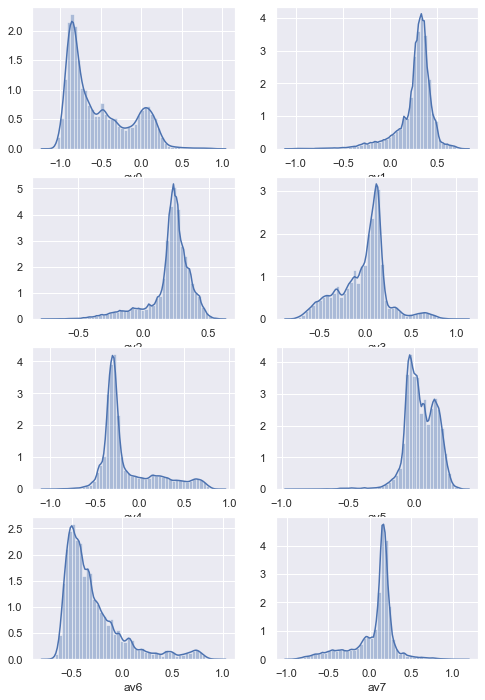

In [40]:
plt.figure(figsize=(8,12))
for i in range(8):
    plt.subplot(4,2,i+1)
    sns.distplot(X[f'av{i}'])


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=2
)

In [42]:
rfc = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=200
).fit(X_train,y_train)

print("RFC Train score: %.5f" % rfc.score(X_train,y_train))
print("RFC Train score: %.5f" % rfc.score(X_test,y_test))

RFC Train score: 0.84108
RFC Train score: 0.81515


***

What if we can add in the rest of the contextual info from the `training_data` dataframe

In [50]:
df.head()

track_id  \
session_id                             session_position                                           
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                 t_0479f24c-27d2-46d6-a00c-7ec928f2b539   
                                       2                 t_9099cd7b-c238-47b7-9381-f23f2c1d1043   
                                       3                 t_fc5df5ba-5396-49a7-8b29-35d0d28249e0   
                                       4                 t_23cff8d6-d874-4b20-83dc-94e450e8aa20   
                                       5                 t_64f3743c-f624-46bb-a579-0f3f9a07a123   

                                                              av0       av1  \
session_id                             session_position                       
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                -0.815775  0.386409   
                                       2                -0.713646  0.363718   
                                       3                -0.742541  0.375599   
                                       4                -0.705116  0.317562   
                                       5                -0.868489  0.331280   

                                                              av2       av3  \
session_id                             session_position                       
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                 0.230160  0.028028   
                                       2                 0.310315 -0.042222   
                                       3                 0.252660 -0.049007   
                                       4                 0.289141 -0.038920   
                                       5                 0.210478  0.084740   

                                                              av4       av5  \
session_id                             session_position                       
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                -0.333373  0.015452   
                                       2                -0.383164  0.066357   
                                       3                -0.299745  0.063341   
                                       4                -0.393358  0.092719   
                                       5                -0.333287 -0.025706   

                                                              av6       av7  \
session_id                             session_position                       
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                -0.353590  0.205826   
                                       2                -0.365308  0.157920   
                                       3                -0.486689  0.181604   
                                       4                -0.364418  0.285603   
                                       5                -0.510350  0.182315   

                                                         skipped  ...  \
session_id                             session_position           ...   
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                       0  ...   
                                       2                       0  ...   
                                       3                       0  ...   
                                       4                       0  ...   
                                       5                       0  ...   

                                                         skip_av6  skip_av7  \
session_id                             session_position                       
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                      NaN       NaN   
                                       2                      0.0       0.0   
                                       3                      0.0       0.0   
                                       4                      0.0       0.0   
                                       5                      0.0       0.0   

                                                         play_av0  play_av1  \
session_id                      

In [51]:
df.head().reset_index().merge(training_set)

,session_id,session_position,track_id,av0,av1,av2,av3,av4,av5,av6,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,t_64f3743c-f624-46bb-a579-0f3f9a07a123,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [94]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 18 columns):
session_id                         167880 non-null object
session_position                   167880 non-null int64
session_length                     167880 non-null int64
track_id_clean                     167880 non-null object
context_switch                     167880 non-null int64
no_pause_before_play               167880 non-null int64
short_pause_before_play            167880 non-null int64
long_pause_before_play             167880 non-null int64
hist_user_behavior_n_seekfwd       167880 non-null int64
hist_user_behavior_n_seekback      167880 non-null int64
hist_user_behavior_is_shuffle      167880 non-null bool
hour_of_day                        167880 non-null int64
date                               167880 non-null datetime64[ns]
premium                            167880 non-null bool
context_type                       167880 non-null category
hist_user_behavior_rea

In [135]:
nonulls = df.reset_index().merge(
    training_set,
    how='left'
).set_index(
    ['session_id','session_position']
).dropna()
nonulls.hist_user_behavior_is_shuffle = nonulls.hist_user_behavior_is_shuffle.astype('int32')
nonulls.premium = nonulls.premium.astype('int32')
nonulls.date = nonulls.date.apply(lambda d: d.value)

X = nonulls.drop(
    columns=['track_id','skipped',"track_id_clean","hist_user_behavior_reason_end"]
)

In [136]:
X = pd.get_dummies(
    X,
    columns=[
        "context_type",
        "hist_user_behavior_reason_start"
    ],
    drop_first=True
)
y = nonulls[(~nonulls.isna().sum(1).astype('bool')).values].skipped

In [137]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=2
)

In [139]:
rfc = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=20
).fit(X_train,y_train)

print("RFC Train score: %.5f" % rfc.score(X_train,y_train))
print("RFC Test score:  %.5f" % rfc.score(X_test,y_test))

RFC Train score: 0.96100
RFC Test score:  0.87459


In [140]:
import pickle

with open(f"data/pickles/best_rfc_{rfc.score(X_test,y_test):.2f}test.pkl",'wb') as f:
    pickle.dump(rfc,f)
!ls data/pickles

best_rfc_0.87test.pkl                   session_accoustic_vec_with_past_avg.pkl
best_xgbc_0.86test.pkl                  track_features.pkl
full_session_vecs.pkl


***

`XGBoost` Version:

In [141]:
# X = df.drop(columns=['track_id','skipped'])
# X = X.fillna(X.mean())
# y = df.skipped
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.15,
    random_state=2
)

In [146]:
xgb = XGBClassifier(
    n_estimators=100000,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.5,
    n_jobs=6,
#     min_child_weight=1,
    colsample_bytree=.8
).fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train),(X_val, y_val)],
    early_stopping_rounds=10,
    verbose=True
)


print("XGB Train score: %.5f" % xgb.score(X_train,y_train))
print("XGB Val score:   %.5f" % xgb.score(X_val,y_val))
print("XGB Test score:  %.5f" % xgb.score(X_test,y_test))

[0]	validation_0-error:0.194947	validation_1-error:0.194629
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.178593	validation_1-error:0.18275
[2]	validation_0-error:0.176794	validation_1-error:0.180554
[3]	validation_0-error:0.1759	validation_1-error:0.180104
[4]	validation_0-error:0.174469	validation_1-error:0.178471
[5]	validation_0-error:0.173347	validation_1-error:0.178415
[6]	validation_0-error:0.167962	validation_1-error:0.174192
[7]	validation_0-error:0.168905	validation_1-error:0.175431
[8]	validation_0-error:0.168528	validation_1-error:0.174417
[9]	validation_0-error:0.166203	validation_1-error:0.171884
[10]	validation_0-error:0.165488	validation_1-error:0.173066
[11]	validation_0-error:0.162964	validation_1-error:0.169744
[12]	validation_0-error:0.161702	validation_1-error:0.169463
[13]	validation_0-error:0.160142	validation_1-error:0.16721

In [148]:
import pickle

with open(f"data/pickles/best_xgbc_{xgb.score(X_test,y_test):.2f}test.pkl",'wb') as f:
    pickle.dump(xgb,f)
!ls -lh data/pickles

total 329992
-rw-r--r--  1 Austin  staff    69M Feb  6 15:42 best_rfc_0.87test.pkl
-rw-r--r--  1 Austin  staff   7.8M Feb  5 16:20 best_xgbc_0.86test.pkl
-rw-r--r--  1 Austin  staff   1.4M Feb  6 15:49 best_xgbc_0.89test.pkl
-rw-r--r--  1 Austin  staff   4.9M Feb  6 15:45 best_xgbc_0.90test.pkl
-rw-r--r--  1 Austin  staff    38M Feb  6 14:52 full_session_vecs.pkl
-rw-r--r--  1 Austin  staff    27M Feb  6 14:17 session_accoustic_vec_with_past_avg.pkl
-rw-r--r--  1 Austin  staff    13M Feb  6 10:56 track_features.pkl


In [149]:
for p in sorted(zip(X.columns,xgb.feature_importances_),key=lambda p: p[1],reverse=True):
    print("%45s | %.5f" % p)

    hist_user_behavior_reason_start_trackdone | 0.51734
       hist_user_behavior_reason_start_fwdbtn | 0.07783
     hist_user_behavior_reason_start_clickrow | 0.06218
                      short_pause_before_play | 0.05982
                         no_pause_before_play | 0.03248
                       long_pause_before_play | 0.02632
                hist_user_behavior_n_seekback | 0.01346
                                     play_av1 | 0.01314
                                     play_av2 | 0.01255
                                     play_av6 | 0.01196
      hist_user_behavior_reason_start_backbtn | 0.00901
                hist_user_behavior_is_shuffle | 0.00843
                                     skip_av0 | 0.00783
                                     skip_av1 | 0.00756
                                     skip_av6 | 0.00749
                                     skip_av2 | 0.00744
                               context_switch | 0.00730
                                     play_av5 | 

Let's look at what it's getting wrong...

In [158]:
from sklearn.metrics import confusion_matrix

In [159]:
y_prob = xgb.predict_proba(X_test)
y_pred = xgb.predict(X_test)

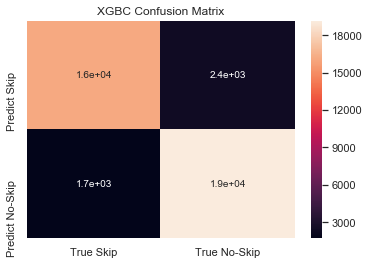

In [167]:
sns.heatmap(
    confusion_matrix(y_test,y_pred),
    annot=True,
    xticklabels=["True Skip","True No-Skip"],
    yticklabels=["Predict Skip","Predict No-Skip"]
)
plt.title("XGBC Confusion Matrix")
plt.show()

***

In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [155]:
X_train.shape

(100648, 48)

In [153]:
m = Sequential()
m.add(Dense(32,activation='relu',input_shape=(X_train.shape[1],)))
m.add(Dropout(0.2))
m.add(Dense(64,activation='relu'))
m.add(Dropout(0.2))
m.add(Dense(64,activation='relu'))
m.add(Dropout(0.2))
m.add(Dense(1,activation='softmax'))
m.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [156]:
m.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=200,
    validation_data=(X_val,y_val),
    callbacks=[EarlyStopping(patience=10)]
)

Train on 100648 samples, validate on 17762 samples
Epoch 1/200
100648/100648 [==============================] - 5s 50us/sample - loss: 7.2469 - accuracy: 0.5248 - val_loss: 7.2048 - val_accuracy: 0.5275
Epoch 2/200
100648/100648 [==============================] - 4s 43us/sample - loss: 7.2469 - accuracy: 0.5248 - val_loss: 7.2048 - val_accuracy: 0.5275
Epoch 3/200
100648/100648 [==============================] - 4s 44us/sample - loss: 7.2469 - accuracy: 0.5248 - val_loss: 7.2048 - val_accuracy: 0.5275
Epoch 4/200
100648/100648 [==============================] - 4s 43us/sample - loss: 7.2469 - accuracy: 0.5248 - val_loss: 7.2048 - val_accuracy: 0.5275
Epoch 5/200
100648/100648 [==============================] - 4s 44us/sample - loss: 7.2469 - accuracy: 0.5248 - val_loss: 7.2048 - val_accuracy: 0.5275
Epoch 6/200
100648/100648 [==============================] - 5s 45us/sample - loss: 7.2469 - accuracy: 0.5248 - val_loss: 7.2048 - val_accuracy: 0.5275
Epoch 7/200
100648/100648 [==========

In [157]:
print("Train score...")
m.evaluate(X_train,y_train)
print("\nTest score...") 
m.evaluate(X_test,y_test)

Train score...
100648/100648 [==============================] - 2s 19us/sample - loss: 7.2469 - accuracy: 0.5248

Test score...
39470/39470 [==============================] - 1s 20us/sample - loss: 7.1884 - accuracy: 0.5286


[7.188430071807312, 0.52860403]

***

__Now try the same with the non-acoustic-vector information__

In [4]:
track_data = (
    track_features.set_index(
        'track_id'
    ).drop(columns=[c for c in track_features.columns if 'acoustic_vector' in c])
    .reset_index()
)
track_data.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,0,0.132124,-11.238,0.386100,1,0.541606,0.079985,166.287003,4,0.935512
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,0,0.163281,-13.706,0.125000,1,0.895874,0.083877,95.261002,3,0.359675
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,0,0.090115,-10.522,0.200669,0,0.806136,0.038777,105.185997,4,0.726769
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,0,0.360924,-11.032,0.427152,1,0.492772,0.038337,119.441002,4,0.859075
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,0,0.189162,-6.836,0.281250,1,0.723808,0.032043,95.261002,4,0.562343


In [5]:
track_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 22 columns):
track_id                  50704 non-null object
duration                  50704 non-null float64
release_year              50704 non-null int64
us_popularity_estimate    50704 non-null float64
acousticness              50704 non-null float64
beat_strength             50704 non-null float64
bounciness                50704 non-null float64
danceability              50704 non-null float64
dyn_range_mean            50704 non-null float64
energy                    50704 non-null float64
flatness                  50704 non-null float64
instrumentalness          50704 non-null float64
key                       50704 non-null int64
liveness                  50704 non-null float64
loudness                  50704 non-null float64
mechanism                 50704 non-null float64
mode                      50704 non-null int32
organism                  50704 non-null float64
speechiness     

In [6]:
training_set.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [11]:
session_data = (
    training_set[['session_id','session_position','track_id_clean', 'skipped']]
    .merge(
        track_data,
        how='left',
        left_on=['track_id_clean'],
        right_on=['track_id']
    ).drop(columns='track_id_clean')
)
session_data.head()

,session_id,session_position,skipped,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,...,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,...,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,236.796371,2018,99.896728,0.061811,0.654804,0.735661,...,7,0.104322,-5.319,0.824766,0,0.131391,0.061158,130.037994,4,0.337152
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,231.266663,2018,99.999976,0.354116,0.532155,0.540411,...,10,0.135776,-5.843,0.774327,1,0.296923,0.045354,145.028000,4,0.373862
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,169.826675,2018,99.995038,0.769225,0.641756,0.729224,...,1,0.103722,-7.756,0.630996,1,0.603271,0.229936,111.982002,4,0.649420
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,0,t_64f3743c-f624-46bb-a579-0f3f9a07a123,210.545258,2018,99.998498,0.006602,0.732428,0.794881,...,8,0.120842,-4.919,0.759465,1,0.170148,0.240980,147.031006,4,0.652921


In [ ]:
# session_vec_cumsum = session_vectors.drop(columns=['track_id']).groupby(['session_id']).cumsum()
# session_vec_cumsum.head()

